<a href="https://colab.research.google.com/github/PratikshaShetty5618/10DaysML/blob/master/Day5_catsndogs_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.utils.data_utils import get_file
path = get_file('/content/cats_and_dogs_filtered.zip', 
                'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip')

68608000/68606236 [==============================] - 0s 0us/step


In [0]:
!unzip cats_and_dogs_filtered.zip

Archive:  cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2124.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2123.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2122.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2121.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2120.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2119.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2118.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2117.

In [0]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers

In [0]:
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = '/content/cats_and_dogs_filtered/train/'
validation_data_dir = '/content/cats_and_dogs_filtered/validation/'

In [26]:
# used to rescale the pixel values from [0, 255] to [0, 1] interval
datagen = ImageDataGenerator(rescale=1./255)

# automagically retrieve images and their classes for train and validation sets
train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=16,
        class_mode='binary')
validation_generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [27]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(img_width, img_height,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(150, 150,...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.


In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [0]:
nb_epoch = 40
nb_train_samples = 2048
nb_validation_samples = 832

In [30]:
model.fit(
        train_generator,
        nb_epoch=nb_epoch,
        validation_data=validation_generator,
    )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Epoch 1/40
125/125 [==============================] - 67s 534ms/step - loss: 0.7209 - acc: 0.5150 - val_loss: 0.6953 - val_acc: 0.5000
Epoch 2/40
125/125 [==============================] - 66s 526ms/step - loss: 0.6890 - acc: 0.5640 - val_loss: 0.6582 - val_acc: 0.6330
Epoch 3/40
125/125 [==============================] - 66s 528ms/step - loss: 0.6566 - acc: 0.6395 - val_loss: 0.6220 - val_acc: 0.6620
Epoch 4/40
125/125 [==============================] - 67s 532ms/step - loss: 0.5865 - acc: 0.6890 - val_loss: 0.6005 - val_acc: 0.6910
Epoch 5/40
125/125 [==============================] - 66s 531ms/step - loss: 0.5389 - acc: 0.7385 - val_loss: 0.5689 - val_acc: 0.7210
Epoch 6/40
125/125 [==============================] - 66s 529ms/step - loss: 0.4711 - acc: 0.7710 - val_loss: 0.5513 - val_acc: 0.7330
Epoch 7/40
125/125 [==============================] - 66s 525ms/step - loss: 0.4407 - acc: 0.8040 - val_loss: 0.5831 - val_acc: 0.7380
Epoch 8/40
125/125 [==============================] - 6

In [0]:
model.save_weights('catsndogs_30_epochs.h5')

In [0]:
acc = model.evaluate_generator(validation_generator, nb_validation_samples)


In [33]:
print("Accuracy of the CNN Model: "+str(acc[1]*100)+"%")

Accuracy of the CNN Model: 73.8%


<Figure size 432x288 with 0 Axes>

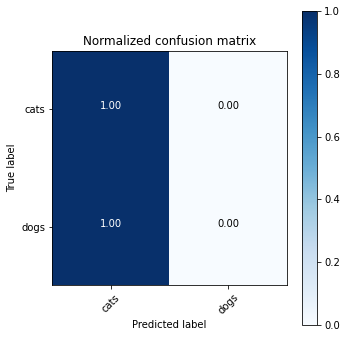

In [38]:
# show the confusion matrix of our predictions
import matplotlib.pyplot as plt

# compute predictions
predictions = model.predict_generator(generator=validation_generator)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = validation_generator.classes
class_names = validation_generator.class_indices.keys()

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()

In [37]:
img =  np.array([validation_generator[0][0]])
predictions = model.predict(img) 
predicted_class = np.argmax(predictions[0])
original_class = y_test[0]
print('Original class: {} \nPredicted class: {}'.format(original_class, predicted_class))


ERROR! Session/line number was not unique in database. History logging moved to new session 59


ValueError: ignored